In [2]:
import pandas as pd

file_path = "../data/partizan_2022_cleaned.csv"

df = pd.read_csv(file_path)

In [3]:
players = df[df['player'] != 'PARTIZAN MOZZART BET BELGRADE'].copy()
active_players = df[(df['player'] != 'PARTIZAN MOZZART BET BELGRADE') & (df['is_playing'] == True)].copy()

In [4]:
# calculate averages by phase
phase_stats = active_players.groupby(['player', 'phase']).agg({
    'points': 'mean',
    'valuation': 'mean',
    'plus_minus': 'mean'
}).unstack()

# rename columns for clarity
phase_stats.columns = [f"{col[0]}_{col[1].lower().replace(' ', '_')}" for col in phase_stats.columns]

# compute differences
phase_stats['points_diff'] = phase_stats['points_playoffs'] - phase_stats['points_regular_season']
phase_stats['valuation_diff'] = phase_stats['valuation_playoffs'] - phase_stats['valuation_regular_season']
phase_stats['plus_minus_diff'] = phase_stats['plus_minus_playoffs'] - phase_stats['plus_minus_regular_season']


# filter for players with data in both phases
phase_stats = phase_stats.dropna(subset=['points_regular_season', 'points_playoffs'])


# print("\nTop 5 Players by Points Increase in Playoffs:")
# print(phase_stats.sort_values('points_diff', ascending=False)[['points_regular_season', 'points_playoffs', 'points_diff']].head(5))

print("\nTop 5 Players by Valuation Increase in Playoffs:")
print(phase_stats.sort_values('valuation_diff', ascending=False)[['valuation_regular_season', 'valuation_playoffs', 'valuation_diff']].head(5))

# print("\nTop 5 Players by Plus-Minus Increase in Playoffs:")
# print(phase_stats.sort_values('plus_minus_diff', ascending=False)[['plus_minus_regular_season', 'plus_minus_playoffs', 'plus_minus_diff']].head(5))


Top 5 Players by Valuation Increase in Playoffs:
                    valuation_regular_season  valuation_playoffs  \
player                                                             
Punter Kevin                       14.176471                24.0   
Madar Yam                           4.515152                 8.2   
Leday Zach                         13.852941                15.6   
Smailagic Alen                      4.760000                 6.4   
Papapetrou Ioannis                  4.939394                 5.8   

                    valuation_diff  
player                              
Punter Kevin              9.823529  
Madar Yam                 3.684848  
Leday Zach                1.747059  
Smailagic Alen            1.640000  
Papapetrou Ioannis        0.860606  


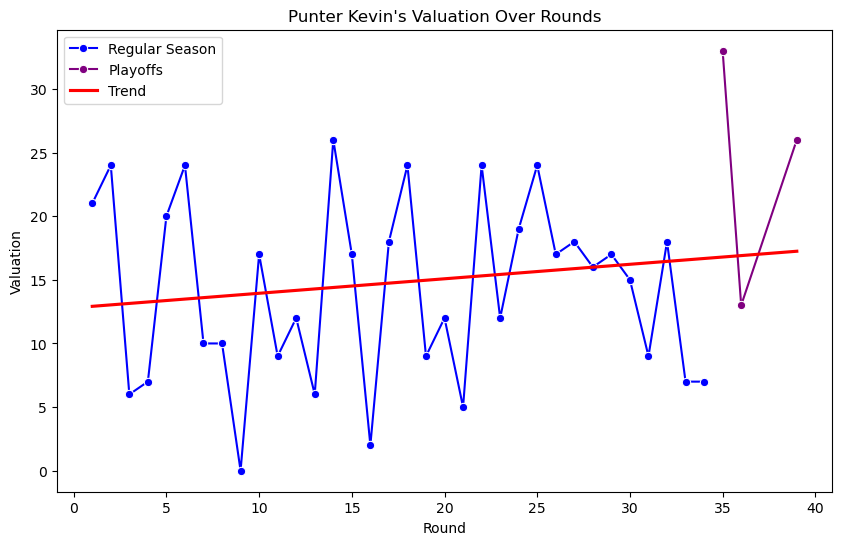

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# filter specific player data
player_name = 'Punter Kevin'
player_data = active_players[active_players['player'] == player_name].sort_values('round')

# Separate regular season and playoffs
regular_season = player_data[player_data['phase'] == 'REGULAR SEASON']
playoffs = player_data[player_data['phase'] == 'PLAYOFFS']


plt.figure(figsize=(10, 6))

# lot regular season points in blue
sns.lineplot(x='round', y='valuation', data=regular_season, marker='o', color='blue', label='Regular Season')

# lot playoff points in purple
sns.lineplot(x='round', y='valuation', data=playoffs, marker='o', color='purple', label='Playoffs')

# add overall trend line in red
sns.regplot(x='round', y='valuation', data=player_data, ci=None, scatter=False, color='red', label='Trend')


plt.title(f"{player_name}'s Valuation Over Rounds")
plt.xlabel('Round')
plt.ylabel('Valuation')
plt.legend()
plt.show()

In [6]:
print("\nTop 5 Players by Points Increase in Playoffs:")
print(phase_stats.sort_values('points_diff', ascending=False)[['points_regular_season', 'points_playoffs', 'points_diff']].head(5))


Top 5 Players by Points Increase in Playoffs:
                    points_regular_season  points_playoffs  points_diff
player                                                                 
Punter Kevin                    15.500000        22.666667     7.166667
Leday Zach                      10.852941        15.400000     4.547059
Papapetrou Ioannis               5.030303         7.600000     2.569697
Smailagic Alen                   5.000000         7.400000     2.400000
Madar Yam                        5.696970         6.600000     0.903030


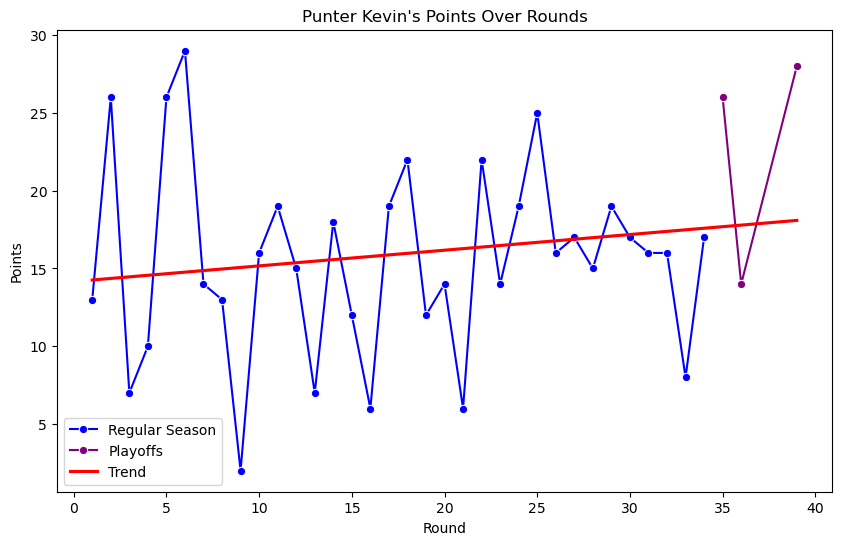

In [7]:
# filter specific player data
player_name = 'Punter Kevin'
player_data = active_players[active_players['player'] == player_name].sort_values('round')

# Separate regular season and playoffs
regular_season = player_data[player_data['phase'] == 'REGULAR SEASON']
playoffs = player_data[player_data['phase'] == 'PLAYOFFS']


plt.figure(figsize=(10, 6))

# lot regular season points in blue
sns.lineplot(x='round', y='points', data=regular_season, marker='o', color='blue', label='Regular Season')

# lot playoff points in purple
sns.lineplot(x='round', y='points', data=playoffs, marker='o', color='purple', label='Playoffs')

# add overall trend line in red
sns.regplot(x='round', y='points', data=player_data, ci=None, scatter=False, color='red', label='Trend')


plt.title(f"{player_name}'s Points Over Rounds")
plt.xlabel('Round')
plt.ylabel('Points')
plt.legend()
plt.show()

In [8]:
# code snippet from plus_minus.ipynb
min_seconds_per_game = 600
filtered_players = players.groupby('player').filter(lambda x: x['total_seconds'].mean() >= min_seconds_per_game)
avg_pm_filtered = filtered_players.groupby('player')['plus_minus'].mean()
top_pm_filtered = avg_pm_filtered.sort_values(ascending=False).head(5)
print("\nTop 5 Players by Average Plus/Minus (All Games, min 600 sec/game):")
print(top_pm_filtered)


Top 5 Players by Average Plus/Minus (All Games, min 600 sec/game):
player
Avramovic Aleksa    3.666667
Punter Kevin        3.000000
Lessort Mathias     2.947368
Exum Dante          2.657895
Leday Zach          2.051282
Name: plus_minus, dtype: float64


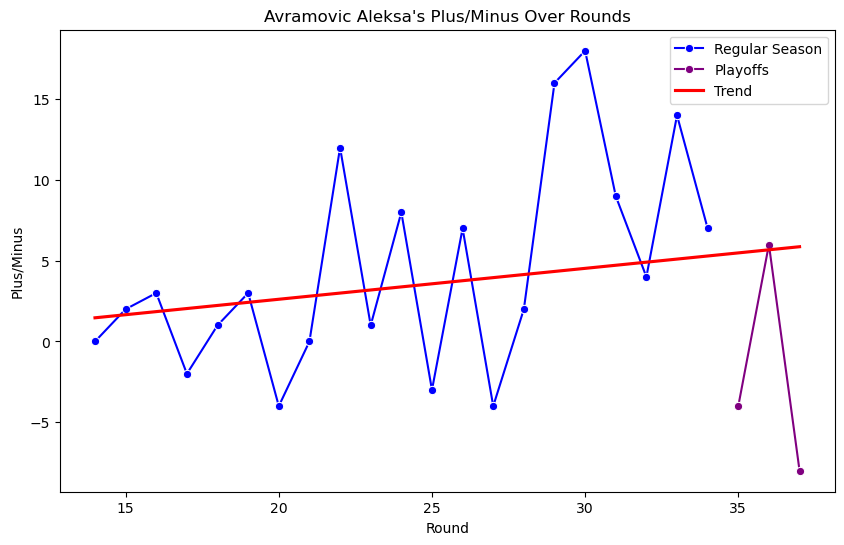

In [9]:
# filter specific player data
player_name = 'Avramovic Aleksa'
player_data = players[players['player'] == player_name].sort_values('round')

# separate regular season and playoffs
regular_season = player_data[player_data['phase'] == 'REGULAR SEASON']
playoffs = player_data[player_data['phase'] == 'PLAYOFFS']


plt.figure(figsize=(10, 6))

# lot regular season points in blue
sns.lineplot(x='round', y='plus_minus', data=regular_season, marker='o', color='blue', label='Regular Season')

# lot playoff points in purple
sns.lineplot(x='round', y='plus_minus', data=playoffs, marker='o', color='purple', label='Playoffs')

# add overall trend line in red
sns.regplot(x='round', y='plus_minus', data=player_data, ci=None, scatter=False, color='red', label='Trend')


plt.title(f"{player_name}'s Plus/Minus Over Rounds")
plt.xlabel('Round')
plt.ylabel('Plus/Minus')
plt.legend()
plt.show()